In [6]:
import os
import subprocess

## ghistorybits

In [53]:
file_names = ['fp_1.bz2', 'fp_2.bz2', 'int_1.bz2', 'int_2.bz2', 'mm_1.bz2', 'mm_2.bz2']
ghistory_files = [file_names[1], file_names[3], file_names[5]]
preds = ['gshare', 'tournament', 'custom']

In [54]:
res_table = {pred : [] for pred in preds}

In [55]:
for pred in preds:
    for fname in ghistory_files:
        cur_rate = []
        for history_bits in range(2, 32, 2):
            cmd = "bunzip2 -kc ../traces/{fname} | ./predictor --{pred}:{param}".format(fname=fname, pred=pred, param=history_bits)
            if pred == 'tournament':
                cmd = "bunzip2 -kc ../traces/{fname} | ./predictor --{pred}:{param}:10:10".format(fname=fname, pred=pred, param=history_bits)
            
            res = subprocess.check_output(cmd, shell=True).decode('ascii')
            mis_rate = float(res.split('\n')[2].split()[2])
            cur_rate.append(mis_rate)
        res_table[pred].append(cur_rate)

In [56]:
res_table

{'gshare': [[44.683,
   23.929,
   17.641,
   11.446,
   6.131,
   3.363,
   1.355,
   1.148,
   1.148,
   1.149,
   1.149,
   1.15,
   1.15,
   1.151,
   1.151],
  [2.152,
   1.947,
   1.71,
   1.255,
   0.734,
   0.496,
   0.401,
   0.356,
   0.322,
   0.32,
   0.327,
   0.314,
   0.315,
   0.32,
   0.324],
  [30.298,
   26.424,
   21.408,
   17.633,
   13.314,
   10.936,
   9.094,
   7.171,
   6.175,
   5.875,
   5.92,
   6.059,
   6.324,
   6.594,
   6.924]],
 'tournament': [[3.707,
   3.708,
   3.824,
   3.246,
   3.317,
   3.179,
   1.811,
   1.442,
   1.21,
   1.211,
   1.211,
   1.211,
   1.211,
   1.212,
   1.212],
  [0.476,
   0.469,
   0.451,
   0.438,
   0.41,
   0.382,
   0.36,
   0.326,
   0.317,
   0.307,
   0.306,
   0.303,
   0.3,
   0.295,
   0.292],
  [9.356,
   9.307,
   9.166,
   8.817,
   8.246,
   7.742,
   6.826,
   6.114,
   5.847,
   5.806,
   5.93,
   6.102,
   6.373,
   6.658,
   6.983]],
 'custom': [[28.533,
   15.12,
   9.837,
   7.237,
   2.71,
   1.325,


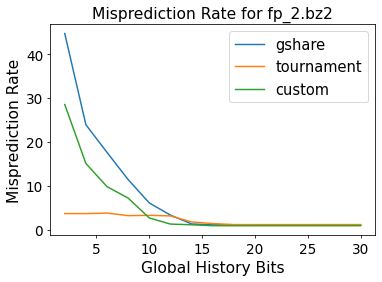

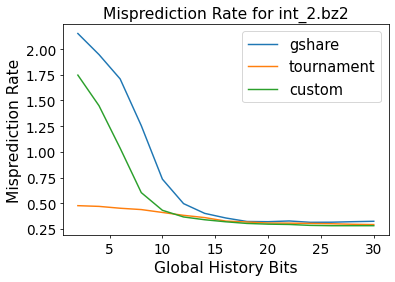

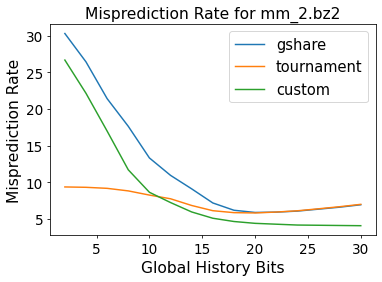

In [57]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(ghistory_files)):
    plt.figure(dpi=70)
    for pred, mis_rate_arr in res_table.items():
        x = [x for x in range(2, 32, 2)]
        y = mis_rate_arr[i]
        plt.plot(x, y, label=pred)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Global History Bits", fontsize=16)  # add X-axis label
    plt.ylabel("Misprediction Rate", fontsize=16)  # add Y-axis label
    plt.title("Misprediction Rate for " + ghistory_files[i], fontsize=16)  # add title
    plt.legend(prop={'size': 15})
    plt.show()

## Choice table

In [101]:
Ys = []
Xs = []
fnames = ['tour_fp2', "tour_int2", "tour_mm2"]
for fname in fnames:
    with open(fname) as f:
        lines = f.readlines()
        num_arr = [int(x.strip()) for x in lines]
        Ys.append(num_arr)
        Xs.append([x for x in range(len(num_arr))])

In [102]:
new_Y = []
new_X = []
for y in Ys:
    cur_y = []
    for i in range(0, len(y), 1000):
        cur_y.append(y[i])
    new_Y.append(cur_y)
    new_X.append([x for x in range(len(cur_y))])

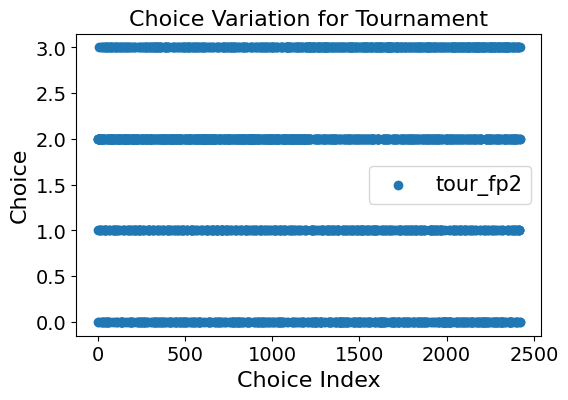

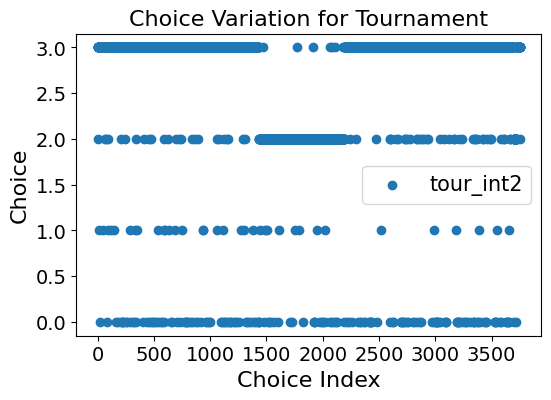

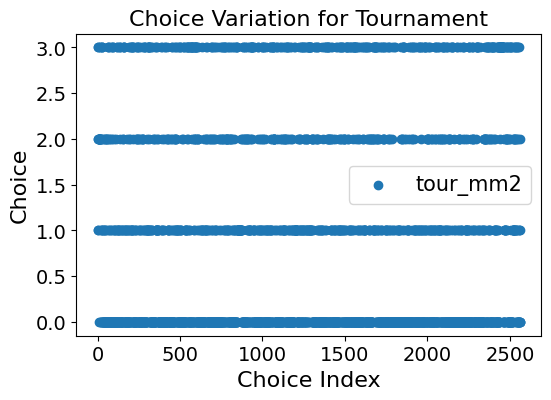

In [103]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(new_X)):
    plt.figure(dpi=100)
    plt.scatter(new_X[i], new_Y[i], label=fnames[i])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Choice Index", fontsize=16)  # add X-axis label
    plt.ylabel("Choice", fontsize=16)  # add Y-axis label
    plt.title("Choice Variation for Tournament", fontsize=16)  # add title
    plt.legend(prop={'size': 15})
    plt.show()

## Variation before/after train

In [107]:
file_names = ['var_custom_fp2', 'var_custom_int2', 'var_custom_mm2', 'var_tour_fp2', 'var_tour_int2', 'var_tour_mm2']

In [131]:
# choice_before, choice_after, prediciton, outcome
fname = file_names[5]
acc_table = {0:0,1:0}
cnt_table = {0:1e-6, 1:1e-6}
res = []

with open(fname) as f:
    lines = f.readlines()
    num_arr = [x.strip() for x in lines]
    
for line in num_arr:
    choice_bf, choice_after, pred, outcome = int(line[0])//2, int(line[1])//2, line[2], line[3]
    cnt_table[choice_bf] += 1
    
    if pred == outcome:
        acc_table[choice_bf] += 1
    
    if choice_bf != choice_after:
        res.append((acc_table[0]/cnt_table[0], acc_table[1]/cnt_table[1]))

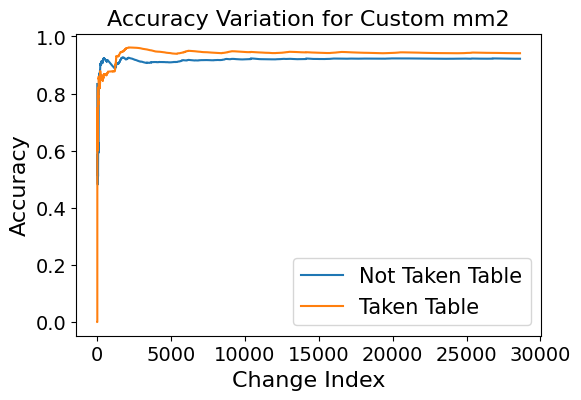

In [125]:
import matplotlib.pyplot as plt
import numpy as np
x = [i for i in range(len(res))]
y1 = [t[0] for t in res]
y2 = [t[1] for t in res]

# for i in range(len(new_X)):
plt.figure(dpi=100)
plt.plot(x, y1, label='Not Taken Table')
plt.plot(x, y2, label='Taken Table')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Change Index", fontsize=16)  # add X-axis label
plt.ylabel("Accuracy", fontsize=16)  # add Y-axis label
plt.title("Accuracy Variation for Custom " + fname.split('_')[-1], fontsize=16)  # add title
plt.legend(prop={'size': 15})
plt.show()

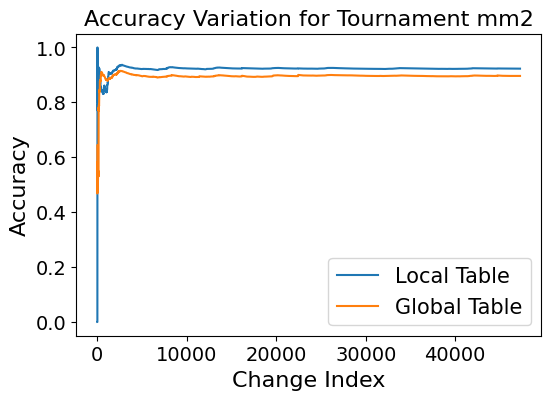

In [132]:
import matplotlib.pyplot as plt
import numpy as np
x = [i for i in range(len(res))]
y1 = [t[0] for t in res]
y2 = [t[1] for t in res]

# for i in range(len(new_X)):
plt.figure(dpi=100)
plt.plot(x, y1, label='Local Table')
plt.plot(x, y2, label='Global Table')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Change Index", fontsize=16)  # add X-axis label
plt.ylabel("Accuracy", fontsize=16)  # add Y-axis label
plt.title("Accuracy Variation for Tournament " + fname.split('_')[-1], fontsize=16)  # add title
plt.legend(prop={'size': 15})
plt.show()